# Tutorial: Extend Wave Function Collapse Algorithm to Large-Scale Content Generation
> Supplementary Material of IEEE Conference on Games (CoG2023)

This is a step-by-step tutorial of how to prepare your tileset and make use of N-WFC and WFC algorithm framework. Pay attention this framework only works for 2D tileset.

Please read the paper before execute this jupyter notebook.

## 1. Input Data

### 1.1 Sub-Complete Tileset Preparation

N-WFC is based on Simple Tiled Model, you have to prepare your own Sub-Complete Tileset. For this tutorial, we use the board game `Carcassone` as an example.

1. Take the location of the jupyter notebook as the root directory and Create your tileset folder `./[folder_name]/`
2. Create the `./[folder_name]/SimpleTiled/` folder to include your tileset
3. Place your prepared Sub-Complete tileset under the `SimpleTiled/` folder. Each tile is a `.png` picture named by number, starting from `0.png`.
4. Create one file named `state_dictionary.csv` under the `SimpleTiled` folder. This file records the edge constraints of each tile

#### 1.1.1 Sub-Complete tileset

The tileset we prepared for `Carcassone` is as follow. It contains 28 tiles.

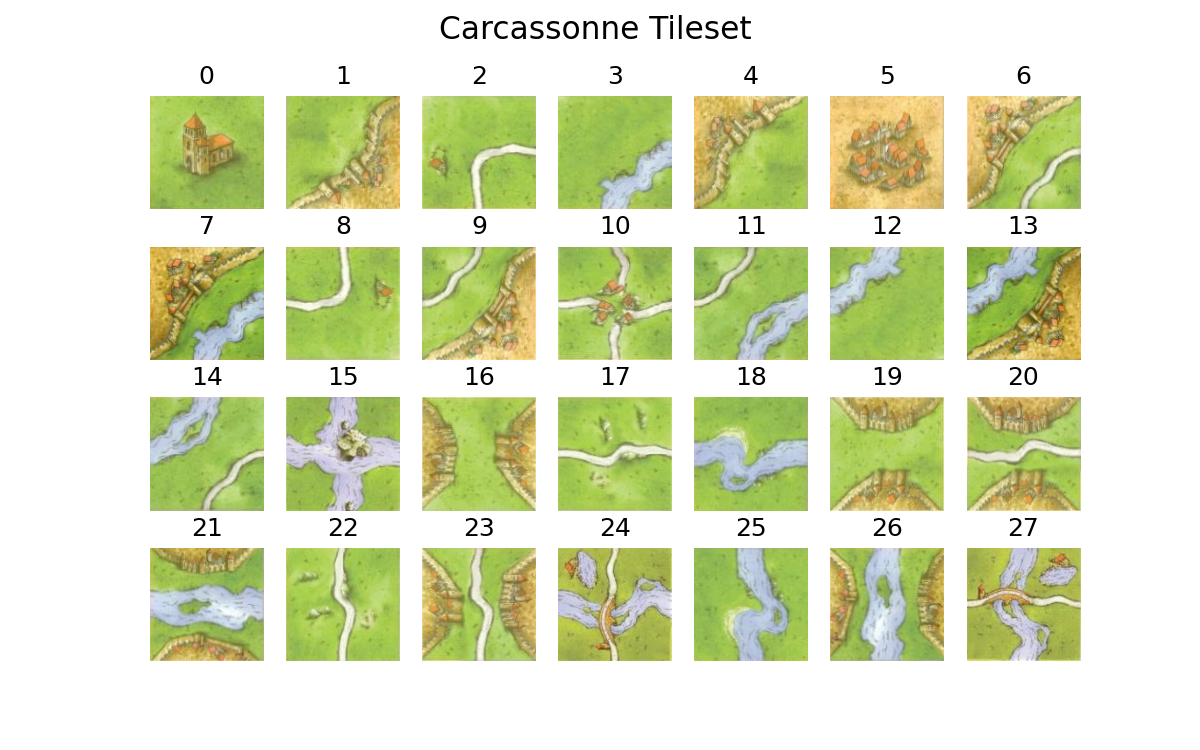

In [7]:
import PIL.Image as Image

img = Image.open('Carcassonne/Other/tileset.png')
img

#### 1.1.1 State Dictionary
This `.csv` file records the edge constraints of your tiles. Each edge type is assigned to a specific `int` number. Make sure the four sides of your tile correspond one to one with the number of the edge type.

This file contains $4$ rows and $n$ columns ($n$ = your tileset number)

Each row represents one direction
 - 1st row: north edge type
 - 2nd row: south edge type
 - 3rd row: west edge type
 - 4th row: east edge type
 
Each column is corrosponding to the name of your tile. Column $n$ is the tile `n.png`

For `Carcassone`, we assigned `0-grass`, `1-city`, `2-path`, `3-stream`

The state dictionary of `Carcassonne` is like:

In [8]:
import pandas as pd
state_dictionary = pd.read_csv('./Carcassonne/SimpleTiled/state_dictionary.csv', header=None)
state_dictionary

0   1   2   3   4   5   6   7   8   9   ...  18  19  20  21  22  23  24  \
0   0   0   0   0   1   1   1   1   2   2  ...   0   1   1   1   2   2   2   
1   0   1   2   3   0   1   2   3   0   1  ...   0   1   1   1   2   2   2   
2   0   0   0   0   1   1   1   1   2   2  ...   3   0   2   3   0   1   3   
3   0   1   2   3   0   1   2   3   0   1  ...   3   0   2   3   0   1   3   

   25  26  27  
0   3   3   3  
1   3   3   3  
2   0   1   2  
3   0   1   2  

[4 rows x 28 columns]

#### 1.1.3 Finish Preparation

The tileset we finish creating is like

```code
Carcassone
│          
└─SimpleTiled
    │  0.png
    │  1.png
    │  2.png
    │  3.png
    │  4.png
    │  5.png
    │  6.png
    │  7.png
    │  8.png
    │  9.png
    │  10.png
    │  11.png
    │  12.png
    │  13.png
    │  14.png
    │  15.png
    │  16.png
    │  17.png
    │  18.png
    │  19.png
    │  20.png
    │  21.png
    │  22.png
    │  23.png
    │  24.png
    │  25.png
    │  26.png
    │  27.png
    └─ state_dictionary.csv
```

## 2. Use WFC or N-WFC framework

To use WFC and N-WFC algorithm is really simple.

### 2.1 WFC

To use the simple tiled model of WFC, use the following process:
1. Initialize a WFC variable, `wfc = WFC(DATA_PATH, SAVE_PATH, simple_tiled)`
  - `DATA_PATH`: your tileset address, like `./[folder_name]/SimpleTiled/`
  - `SAVE_PATH`: your WFC result address, we can create another folder to save your WFC result
  - `simple_tiled`: if true, WFC uses simple tiled model
2. Search for an potential accepted solution for an assigned grid size, `wfc.BTS(row, col, track)`, it will return a 2D matrix, each number represents the tile it finds for your grid
  - `row`: your grid's row lenth
  - `col`: your grid's column length
  - `track`: is true, WFC will enable backtracking and AC-3, other it will not (for complete tileset, you can set `track=False`)
3. Save an accepted solution WFC finds, `wfc.save_diagram(name)`
  - `name`: the solution will be named as `[name].png` and saved under the folder `SAVE_PATH`

In [9]:
from WFC import WFC
import numpy as np
wfc = WFC('Carcassonne/SimpleTiled/', 'Carcassonne/WFCResult/', simple_tiled=True)
wfc.BTS(row=5, col=9, track=True)
wfc.save_diagram('result')

An accepted WFC solution is:

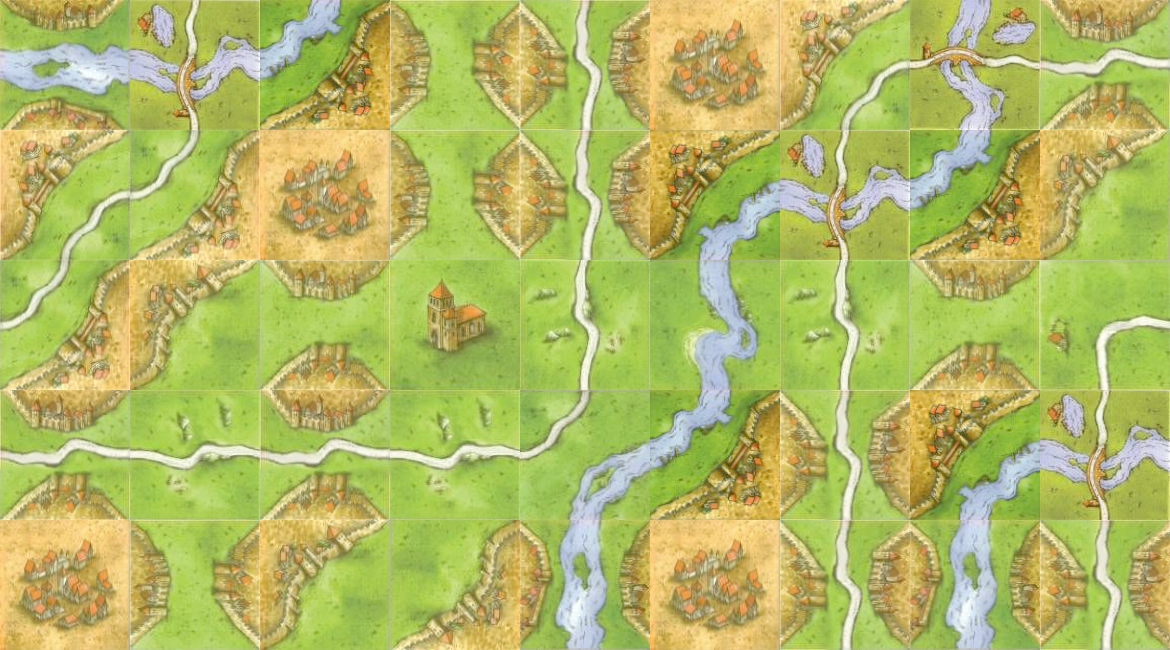

In [10]:
import PIL.Image as Image

img = Image.open('Carcassonne/WFCResult/result.png')
img


### 2.2 N-WFC

To use the N-WFC, use the following process:
1. Initialize a WFC variable, `nwfc = NWFC(DATA_PATH, SAVE_PATH)`
  - `DATA_PATH`: your tileset address, like `./[folder_name]/SimpleTiled/`
  - `SAVE_PATH`: your WFC result address, we can create another folder to save your WFC result
2. Search for an potential accepted solution for an assigned grid size, `nwfc.generate(N, row, col, track)`, it will return a 2D matrix, each number represents the tile it finds for your grid
  - `C`: your sub-grid size
  - `row`: your N-WFC grid's row lenth
  - `col`: your N-WFC grid's column length
  - `track`: is true, WFC will enable backtracking and AC-3, other it will not (for complete tileset, you can set `track=False`)
3. Save an accepted solution WFC finds, `nwfc.save_diagram(name)`
  - `name`: the solution will be named as `[name].png` and saved under the folder `SAVE_PATH`

The gird size of one N-WFC is related to `C`, `row` and `col`. Compared to WFC, the actual size of the grid is
- row = `row * (C-1) + 1`
- col = `col * (C-1) + 1`

In [1]:
from NWFC import NWFC
nwfc = NWFC('Carcassonne/SimpleTiled/', 'Carcassonne/N-WFCResult/')
nwfc.generate(N=5, row=1, col=2, track=False)
nwfc.save_diagram('result')

An accepted N-WFC solution is:

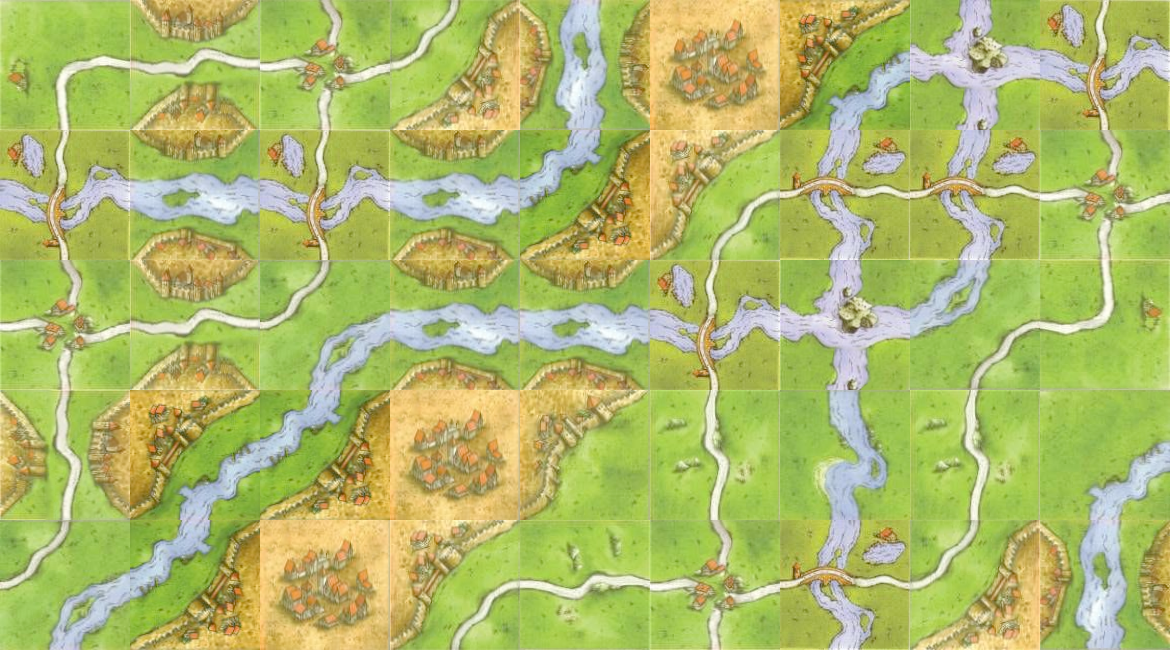

In [2]:
import PIL.Image as Image

img = Image.open('Carcassonne/N-WFCResult/result.png')
img

### 2.3 Modify the framework of WFC and N-WFC for Level Design

Open the `WFC.py` file, you can read the source code of WFC. There are two function can be modify to suit your own design decision
- `observe_wave(self, board, waves, heuristic)`: use different heuristic algorithms to determine which wave to collapse
- `observe_state(self, waves, wave_pos, heuristic)`: use different heuristic algorithms to determine which tile to be chosen in certain wave

In our WFC implementation, the heuristic of `observe_wave` is `MRV` (Minimum Remaining Value), and the the heuristic of `observe_state` is `RANDOM`.

Open the `N-WFC.py` file, you can read the source code of N-WFC. There are one function can be modify to suit your own design decision
- `generate(self, N, row, col, track)`: this is the exterior generation process, you can modify the generation process that suitable for your own design.

In our N-WFC implementation, the exterior generation process is simply a double `for-loop`. It acts the same as the exterior diagonal generation process.

## 3. Experiment

### 3.1 Experiment Dataset

Sub-Complete tileset is logically easy to be implemented. In the experiment, we don't need to deliberately find some tileset with art style to build the experimental model.

`SubcompleteGenerator.py` is the code that is used to generate some logically-identical sub-complete tilesets. Following the definition of sub-complete tileset we mentioned in the paper, we can set the edge type of $\mathcal{E_{NS}}$ and $\mathcal{E_{WE}}$. Make sure $\max\{|\mathcal{E_{NS}}|, |\mathcal{E_{WE}}|\} \geq 2$

In the following code, we create a sub-complete tileset that logically meets the condition. Make sure each edge type in $\mathcal{E_{NS}}$ and $\mathcal{E_{WE}}$ only appears once.

In [2]:
import SubcompleteGenerator as Generator

E_NS = [1, 2, 3, 4, 5, 6]
E_WE = [2, 3, 4, 5, 6, 7, 8, 9, 10]
state_dictionary = Generator.sub_complete_generator(E_NS, E_WE)
Generator.save_state_dictionary('SubComplete-6-9', state_dictionary)

### 3.2 Experiment Reproduction

To repeat our time complexity comparison experiment, you can use the following code when you create your own sub-complete tileset.

In our paper, we create `SubComplete2-2`, `SubComplete4-4`, `SubComplete5-5`, `SubComplete6-6`, `SubComplete7-7`, `SubComplete8-8` sub-complete tilesets.

In [73]:
import Experiment
import time

NWFC 0: mean0.008706974983215331, std0.0009203548921943918
WFC 0: mean0.0362471342086792, std0.0016202317886875918
NWFC 1: mean0.019594573974609376, std0.003686960538630919
WFC 1: mean0.4458500623703003, std0.058996626010282924
NWFC 2: mean0.061728167533874514, std0.02777197258386809
WFC 2: mean5.045662450790405, std0.44809490310864203
NWFC 3: mean0.11630282402038575, std0.008982643470945165
WFC 3: mean17.364626312255858, std0.3607719991618404
NWFC 4: mean0.1877943754196167, std0.006989556235858309
WFC 4: mean79.64162886142731, std1.507191294984271
NWFC 5: mean0.2893794059753418, std0.010377630554230709
WFC 5: mean116.00362930297851, std1.9376353049516524
NWFC 6: mean0.41731789112091067, std0.04646439476595456
WFC 6: mean202.54643301963807, std10.543232094111602
[0.0362471342086792, 0.4458500623703003, 5.045662450790405, 17.364626312255858, 79.64162886142731, 116.00362930297851, 202.54643301963807]
[0.0016202317886875918, 0.058996626010282924, 0.44809490310864203, 0.3607719991618404, 1

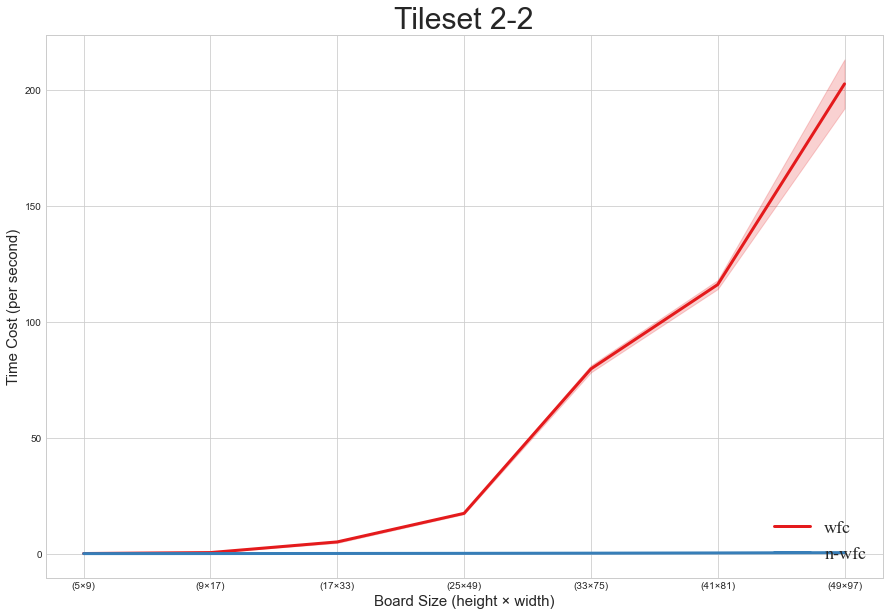

In [75]:
nwfc = NWFC('SubComplete-2-2/SimpleTiled/', 'SubComplete-2-2/NWFCResult/')
wfc = WFC('SubComplete-2-2/SimpleTiled/', 'SubComplete-2-2/WFCResult/', simple_tiled=True)
wfc_list = [(5, 9), (9, 17), (17, 33), (25, 49), (33, 75), (41, 81), (49, 97)]
nwfc_list = [(1, 2), (2, 4), (4, 8), (6, 12), (8, 16), (10, 20), (12, 24)]

wfc_mean = list()
wfc_std = list()
nwfc_mean = list()
nwfc_std = list()

for a in range(7):
    time_nwfc = list()
    time_wfc = list()
    (r1, c1) = nwfc_list[a]
    (r2, c2) = wfc_list[a]

    for i in range(100):
        start = time.time()
        nwfc.generate(5, row=r1, col=c1)
        end = time.time()
        time_cost = end - start
        time_nwfc.append(time_cost)

        start = time.time()
        board = wfc.BTS(row=r2, col=c2)
        end = time.time()
        time_cost = end - start
        time_wfc.append(time_cost)

    nwfc_mean.append(np.mean(time_nwfc))
    nwfc_std.append(np.std(time_nwfc))
    print('NWFC {}: mean{}, std{}'.format(a, np.mean(time_nwfc), np.std(time_nwfc)))

    wfc_mean.append(np.mean(time_wfc))
    wfc_std.append(np.std(time_wfc))
    print('WFC {}: mean{}, std{}'.format(a, np.mean(time_wfc), np.std(time_wfc)))

print(wfc_mean)
print(wfc_std)
print(nwfc_mean)
print(nwfc_std)

Experiment.plot_experiment_result('Tileset 2-2', (wfc_mean, wfc_std), (nwfc_mean, nwfc_std))